### Boxplot Project

Summarise the history of the box plot and situations in which it used.
• Demonstrate the use of the box plot using data of your choosing.
• Explain any relevant terminology such as the terms quartile and percentile.
• Compare the box plot to alternatives.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Let's have a look at the meteorological data from the Gurteen met station in Tipperary
df = pd.read_csv("http://cli.met.ie/cli/climate_data/webdata/hly1475.csv", skiprows=17,skip_blank_lines=True, low_memory=False, usecols = [0,4])
df.shape
df.head(2)

,date,temp
0,31-dec-2007 01:00,
1,31-dec-2007 02:00,


In [3]:
df.tail(2)

,date,temp
94270,31-oct-2018 23:00,2.2
94271,01-nov-2018 00:00,1.7


In [4]:
df.dtypes

date    object
temp    object
dtype: object

In [5]:
#Checking for data issues (empty cells) as follows;
df.isnull().sum()

date    0
temp    0
dtype: int64

In [6]:
#We are only interested in the date and temperature columns, however they are returned as 'object' type data, so we must convert to relevant data form.
#First we will look at the date to datetime conversion, and then the temperature to a numeric conversion.
df['Datetime'] = pd.to_datetime(df['date'])
df['Temp'] = pd.to_numeric(df['temp'], errors='coerce')# Important to convert objects to numbers, but this creates another issue regarding 'NaN' cells.
df.head(2)

,date,temp,Datetime,Temp
0,31-dec-2007 01:00,,2007-12-31 01:00:00,NaN
1,31-dec-2007 02:00,,2007-12-31 02:00:00,NaN


In [7]:
#Let's check our cells for any missing data issues!
df.isnull().sum()

date          0
temp          0
Datetime      0
Temp        253
dtype: int64

In [28]:
df.describe()

,Temp
count,94272.000000
mean,9.597077
std,5.274437
min,-13.400000
25%,6.000000
50%,9.800000
75%,13.400000
max,29.700000


In [9]:
#The new column 'Temp' which is now numeric (dtype Int64) contains NaN cells.
#Ok, so we now know (after some extensive testing and research) that we can't plot with 'NaN' cells.  So to deal with this we will insert the average value into the 'NaN' data cells  
df.fillna(9.6, inplace=True)

In [10]:
df.isnull().sum()

date        0
temp        0
Datetime    0
Temp        0
dtype: int64

In [11]:
#Now rearrange the columns so that we have Datetime first and eliminate unnecessary noise;
df = df[['Datetime', 'Temp']]
df.head(1)

,Datetime,Temp
0,2007-12-31 01:00:00,9.5


In [12]:
df.tail(1)

,Datetime,Temp
94271,2018-11-01,1.7


In [13]:
df.describe()

,Temp
count,94272.000000
mean,9.597077
std,5.274437
min,-13.400000
25%,6.000000
50%,9.800000
75%,13.400000
max,29.700000


In [14]:
#Select the data range from the 1st year of the dataset;
df1 = df.iloc[8087:16847]

In [15]:
#To check the correct starting time for our analysis use;
df1.head(2)

,Datetime,Temp
8087,2009-01-01 00:00:00,3.2
8088,2009-01-01 01:00:00,3.1


In [16]:
#To check the ending time for our analysis;
df1.tail(2)

,Datetime,Temp
16845,2009-12-31 22:00:00,-1.4
16846,2009-12-31 23:00:00,-3.9


In [17]:
df1.describe()

,Temp
count,8760.000000
mean,9.440696
std,5.240999
min,-7.100000
25%,6.000000
50%,9.700000
75%,13.300000
max,25.900000


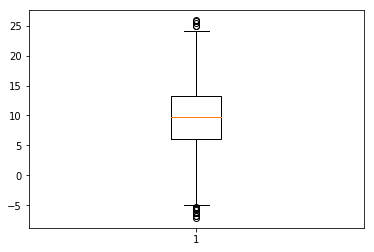

In [18]:
A = plt.boxplot(df1['Temp'])

In [19]:
#Select the data range from the 2nd year of the dataset;
df2 = df.iloc[16847:25607]

In [20]:
df2.describe()

,Temp
count,8760.000000
mean,8.311998
std,6.609356
min,-13.400000
25%,3.700000
50%,9.000000
75%,13.400000
max,24.500000


In [21]:
df2.head(1)

,Datetime,Temp
16847,2010-01-01,-2.4


In [22]:
df2.tail(1)

,Datetime,Temp
25606,2010-12-31 23:00:00,4.8


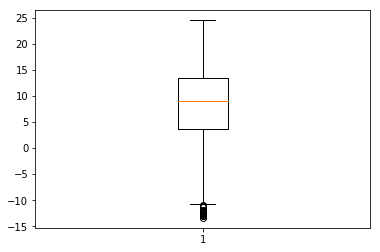

In [23]:
B = plt.boxplot(df2['Temp'])

In [24]:
df3 = df.iloc[25607:34367]
df3.head(1)

,Datetime,Temp
25607,2011-01-01,5.0


In [25]:
df3.tail(1)


,Datetime,Temp
34366,2011-12-31 23:00:00,9.0


In [26]:
df3.describe()

,Temp
count,8760.000000
mean,9.718824
std,4.681200
min,-6.100000
25%,6.900000
50%,10.400000
75%,13.000000
max,23.500000


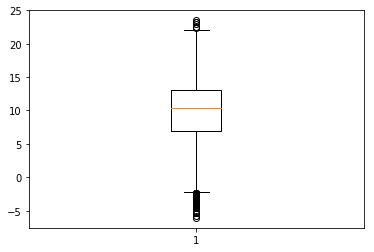

In [27]:
C = plt.boxplot(df3['Temp'])

In [34]:
df4 = df.iloc[34367:43127]
df4.head(2)

,Datetime,Temp
34367,2012-01-01 00:00:00,8.8
34368,2012-01-01 01:00:00,8.6


In [35]:
df4.tail(2)

,Datetime,Temp
43125,2012-12-30 22:00:00,10.5
43126,2012-12-30 23:00:00,10.3


In [36]:
df4.describe()


,Temp
count,8760.000000
mean,9.470137
std,4.652694
min,-4.100000
25%,6.300000
50%,9.400000
75%,12.500000
max,24.500000


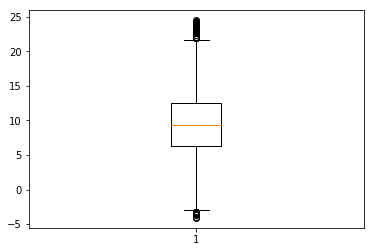

In [37]:
D = plt.boxplot(df4['Temp'])

In [42]:
df5 = df.iloc[43127:51887]
df5.head(2)

,Datetime,Temp
43127,2012-12-31 00:00:00,10.1
43128,2012-12-31 01:00:00,10.5


In [43]:
df5.tail(2)

,Datetime,Temp
51885,2013-12-30 22:00:00,8.2
51886,2013-12-30 23:00:00,8.4


In [44]:
df5.describe()

,Temp
count,8760.000000
mean,9.495548
std,5.694850
min,-6.300000
25%,5.400000
50%,9.400000
75%,13.525000
max,28.400000


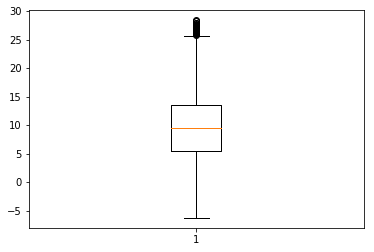

In [45]:
E = plt.boxplot(df5['Temp'])

In [48]:
df6 = df.iloc[51887:60647]
df6.head(2)

,Datetime,Temp
51887,2013-12-31 00:00:00,8.5
51888,2013-12-31 01:00:00,8.5


In [49]:
df6.tail(2)

,Datetime,Temp
60645,2014-12-30 22:00:00,8.1
60646,2014-12-30 23:00:00,7.7


In [50]:
df.describe()

,Temp
count,94272.000000
mean,9.597077
std,5.274437
min,-13.400000
25%,6.000000
50%,9.800000
75%,13.400000
max,29.700000


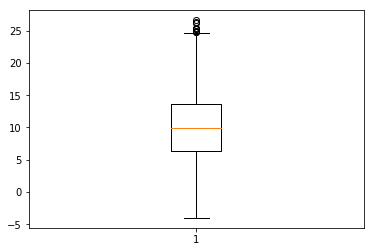

In [51]:
F = plt.boxplot(df6['Temp'])

In [60]:
df7 = df.iloc[60647:69407]
df7.head(2)

,Datetime,Temp
60647,2014-12-31 00:00:00,8.4
60648,2014-12-31 01:00:00,8.7


In [61]:
df7.tail(2)

,Datetime,Temp
69405,2015-12-30 22:00:00,5.0
69406,2015-12-30 23:00:00,4.3


In [62]:
df7.describe()

,Temp
count,8760.000000
mean,9.437728
std,4.618366
min,-5.900000
25%,6.200000
50%,9.800000
75%,12.800000
max,22.800000


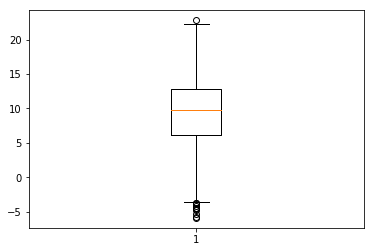

In [63]:
G = plt.boxplot(df7['Temp'])

In [66]:
df8 = df.iloc[69407:78167]
df8.head(2)

,Datetime,Temp
69407,2015-12-31 00:00:00,3.7
69408,2015-12-31 01:00:00,2.3


In [67]:
df8.tail(2)

,Datetime,Temp
78165,2016-12-29 22:00:00,7.5
78166,2016-12-29 23:00:00,7.4


In [68]:
df.describe()

,Temp
count,94272.000000
mean,9.597077
std,5.274437
min,-13.400000
25%,6.000000
50%,9.800000
75%,13.400000
max,29.700000


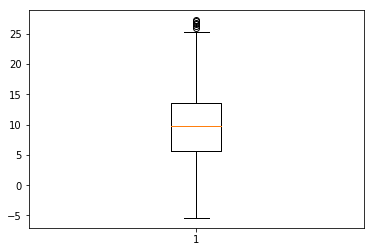

In [69]:
H = plt.boxplot(df8['Temp'])